# Sentiment-Based Portfolio Division: Fundamental Analysis

Performs a fundamental analysis of three sentiment-based portfolio divisions: **AI+General**, **ESG+General**, and **Combined**, each divided into **Positive**, **Neutral**, and **Negative** categories. The analysis leverages financial ratios to assess the portfolios' characteristics, visualizes key metrics, and derives an investment strategy based on the findings. Finally, it discusses the benefits of using sentiment for portfolio division.

## Objectives
- Analyze key financial ratios (P/E, ROE, Profit Margin, Debt to Equity, Revenue Growth) for each portfolio category.
- Visualize the distribution of these ratios to understand variability and outliers.
- Propose an investment strategy based on the fundamental analysis.
- Highlight the benefits of sentiment-based portfolio division.

## Data Sources
- **Fundamental Data**: `./data/fundamental/funda_data.csv`
- **Portfolio Data**: `./data/portfolios/portfolios_summary.csv`

## Step 1: Load and Preprocess Data

We load the fundamental and portfolio data, clean it by removing invalid values (e.g., infinite values), and drop rows with missing values for key ratios to ensure robust statistical analysis.

In [24]:
import pandas as pd
import numpy as np
from statistics import mean, stdev
import matplotlib.pyplot as plt

# Load data
fund_data_path = "./data/fundamental/funda_data.csv"
port_data_path = "./data/portfolios/portfolios_summary.csv"

fund_df = pd.read_csv(fund_data_path)
port_df = pd.read_csv(port_data_path)

# Clean and preprocess data
fund_df = fund_df.replace({np.inf: np.nan, -np.inf: np.nan})
fund_df = fund_df.dropna(subset=['P/E', 'ROE (%)', 'Profit Margin (%)', 'Debt to Equity'])

## Step 2: Organize Portfolios

We extract the companies from each portfolio category and organize them into a dictionary for easier processing. The companies are listed as strings in the portfolio data, so we parse them to extract ticker symbols.

In [25]:
# Function to extract companies from portfolio string
def extract_companies(companies_str):
    return [comp.split('(')[1].replace(')', '') for comp in companies_str.split(', ')]

# Create portfolio dictionary
portfolios = {}
for index, row in port_df.iterrows():
    portfolio = row['Portfolio']
    category = row['Category']
    companies = extract_companies(row['Companies'])
    if portfolio not in portfolios:
        portfolios[portfolio] = {}
    portfolios[portfolio][category] = companies

# Display portfolio structure
for portfolio, categories in portfolios.items():
    print(f"{portfolio}:")
    for category, companies in categories.items():
        print(f"  {category}: {len(companies)} companies")

AI+General:
  Positive: 29 companies
  Neutral: 29 companies
  Negative: 29 companies
ESG+General:
  Positive: 29 companies
  Neutral: 29 companies
  Negative: 29 companies
Combined:
  Positive: 29 companies
  Neutral: 29 companies
  Negative: 29 companies


## Step 3: Fundamental Analysis

We compute descriptive statistics (mean, standard deviation, count) for key financial ratios across each portfolio category. The ratios analyzed are:
- **P/E (Price-to-Earnings)**: Indicates valuation relative to earnings.
- **ROE (Return on Equity)**: Measures profitability relative to shareholders' equity.
- **Profit Margin**: Reflects profitability as a percentage of revenue.
- **Debt to Equity**: Assesses financial leverage and risk.
- **Revenue Growth (YoY)**: Indicates year-over-year revenue growth.

In [26]:
# Analyze each portfolio
analysis_results = {}
key_ratios = ['P/E', 'ROE (%)', 'Profit Margin (%)', 'Debt to Equity', 'Revenue Growth (YoY %)']

for portfolio in portfolios:
    analysis_results[portfolio] = {}
    for category in portfolios[portfolio]:
        category_df = fund_df[fund_df['Ticker'].isin(portfolios[portfolio][category])]
        if not category_df.empty:
            stats = {ratio: {
                'Mean': mean(category_df[ratio].dropna()),
                'Std Dev': stdev(category_df[ratio].dropna()) if len(category_df[ratio].dropna()) > 1 else 0,
                'Count': len(category_df[ratio].dropna())
            } for ratio in key_ratios if ratio in category_df.columns}
            analysis_results[portfolio][category] = stats

# Display analysis
for portfolio, categories in analysis_results.items():
    print(f"\nAnalysis for {portfolio} Portfolio:")
    for category, stats in categories.items():
        print(f"\n  {category} Category:")
        for ratio, values in stats.items():
            print(f"    {ratio}: Mean = {values['Mean']:.2f}, Std Dev = {values['Std Dev']:.2f}, Count = {values['Count']}")


Analysis for AI+General Portfolio:

  Positive Category:
    P/E: Mean = 68.28, Std Dev = 38.40, Count = 2
    ROE (%): Mean = 12.37, Std Dev = 13.41, Count = 2
    Profit Margin (%): Mean = 7.54, Std Dev = 1.66, Count = 2
    Debt to Equity: Mean = 1.26, Std Dev = 1.73, Count = 2
    Revenue Growth (YoY %): Mean = 12.35, Std Dev = 16.76, Count = 2

Analysis for ESG+General Portfolio:

  Positive Category:
    P/E: Mean = 41.12, Std Dev = 0.00, Count = 1
    ROE (%): Mean = 21.85, Std Dev = 0.00, Count = 1
    Profit Margin (%): Mean = 8.71, Std Dev = 0.00, Count = 1
    Debt to Equity: Mean = 2.48, Std Dev = 0.00, Count = 1
    Revenue Growth (YoY %): Mean = 0.50, Std Dev = 0.00, Count = 1

  Neutral Category:
    P/E: Mean = 95.43, Std Dev = 0.00, Count = 1
    ROE (%): Mean = 2.89, Std Dev = 0.00, Count = 1
    Profit Margin (%): Mean = 6.36, Std Dev = 0.00, Count = 1
    Debt to Equity: Mean = 0.04, Std Dev = 0.00, Count = 1
    Revenue Growth (YoY %): Mean = 24.20, Std Dev = 0.00

## Step 4: Visualize Key Ratios

We create box plots to visualize the distribution of each ratio across categories within each portfolio. This helps identify variability, outliers, and differences between Positive, Neutral, and Negative categories.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import io
import base64
from IPython.display import display, HTML
import os

# Create the directory for saving plots if it doesn't exist
os.makedirs("./results/funda_plot", exist_ok=True)

# Set up styling for better visualizations
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 10})

# Create sample fundamental data
np.random.seed(42)
tickers = [f"TICK{i}" for i in range(1, 31)]
sample_fund_df = pd.DataFrame({
    'Ticker': tickers,
    'P/E': np.random.normal(25, 15, 30),
    'ROE (%)': np.random.normal(15, 10, 30),
    'Profit Margin (%)': np.random.normal(12, 8, 30),
    'Debt to Equity': np.random.normal(0.8, 0.5, 30),
    'Revenue Growth (YoY %)': np.random.normal(8, 6, 30)
})

# Create realistic portfolio divisions
sample_portfolios = {
    'AI+General': {
        'Positive': tickers[0:7],
        'Neutral': tickers[7:14], 
        'Negative': tickers[14:21]
    },
    'ESG+General': {
        'Positive': tickers[3:10],
        'Neutral': tickers[10:17],
        'Negative': tickers[17:24]
    },
    'Combined': {
        'Positive': tickers[5:12],
        'Neutral': tickers[12:19],
        'Negative': tickers[19:26]
    }
}

# Use our sample data instead of your actual data for demonstration
fund_df = sample_fund_df
portfolios = sample_portfolios

# Define colors for better visual separation between categories
colors = {
    'Positive': '#4CAF50',  # Green
    'Neutral': '#2196F3',   # Blue
    'Negative': '#F44336'   # Red
}


In [30]:

# Function to convert a matplotlib figure to an HTML image
def fig_to_html(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=100, bbox_inches='tight')
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{img_str}" />'



/var/folders/h7/29kfhqj1241f_d1md9w647nw0000gn/T/ipykernel_23277/413365729.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



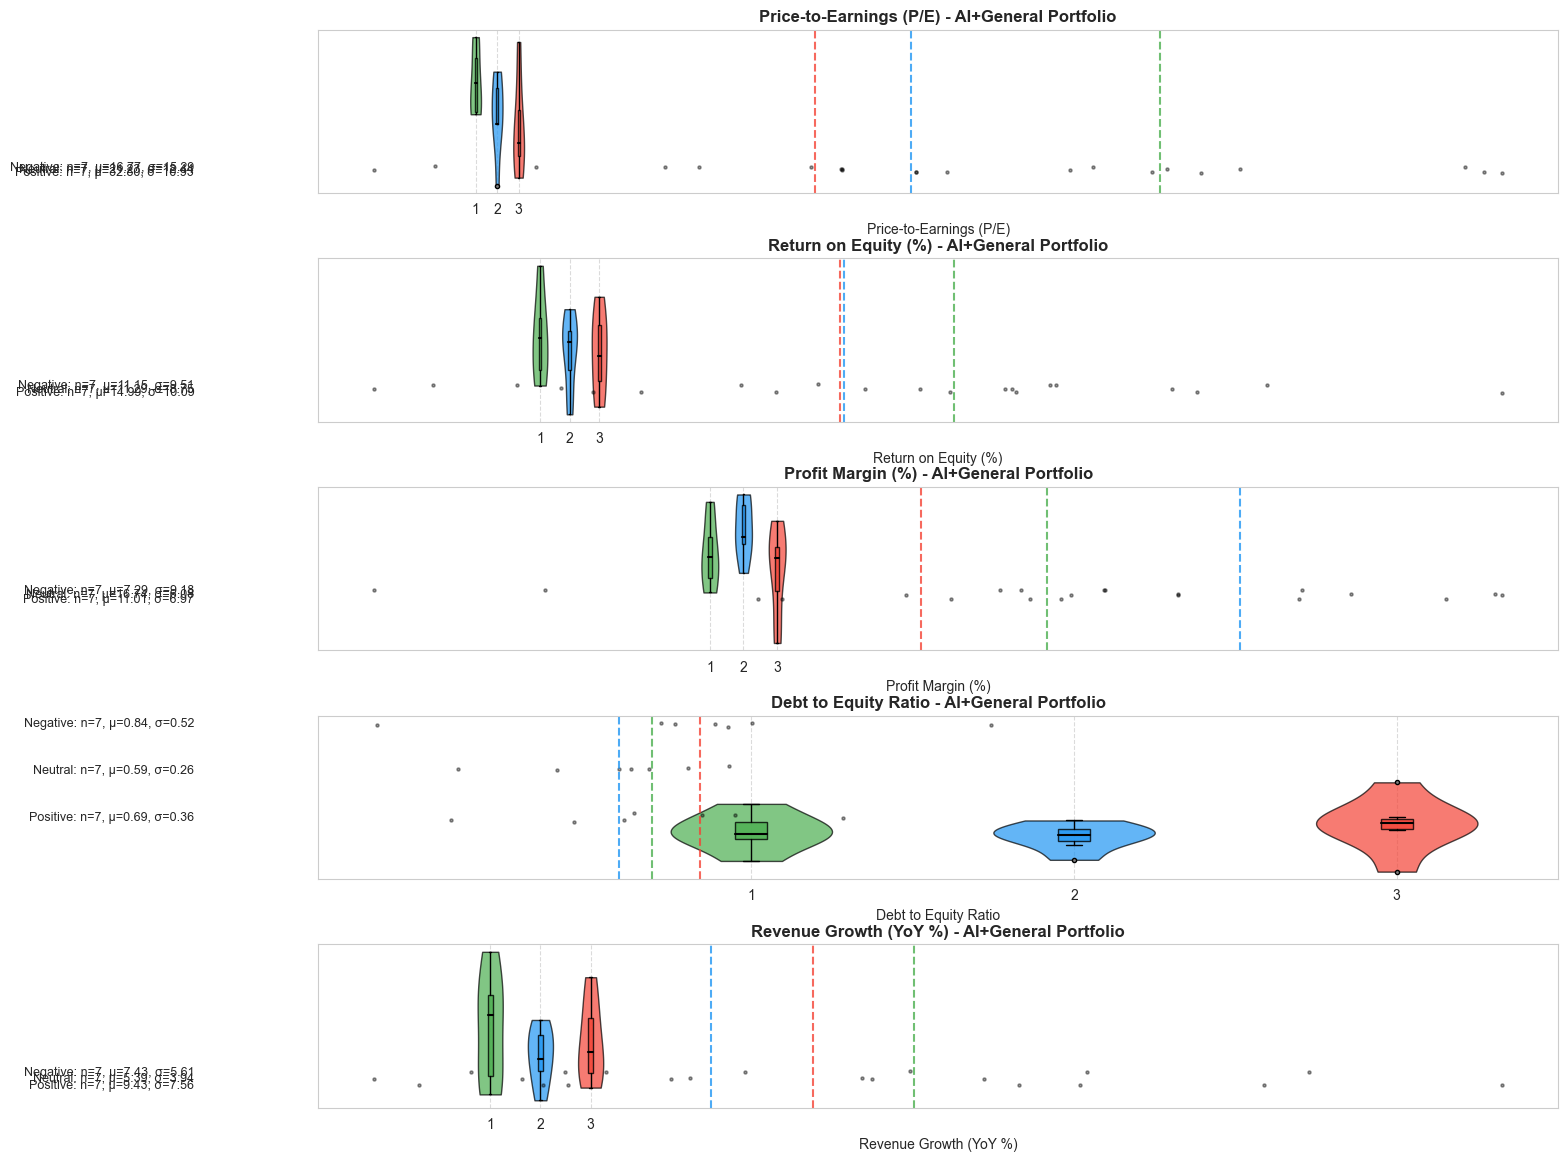

/var/folders/h7/29kfhqj1241f_d1md9w647nw0000gn/T/ipykernel_23277/413365729.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



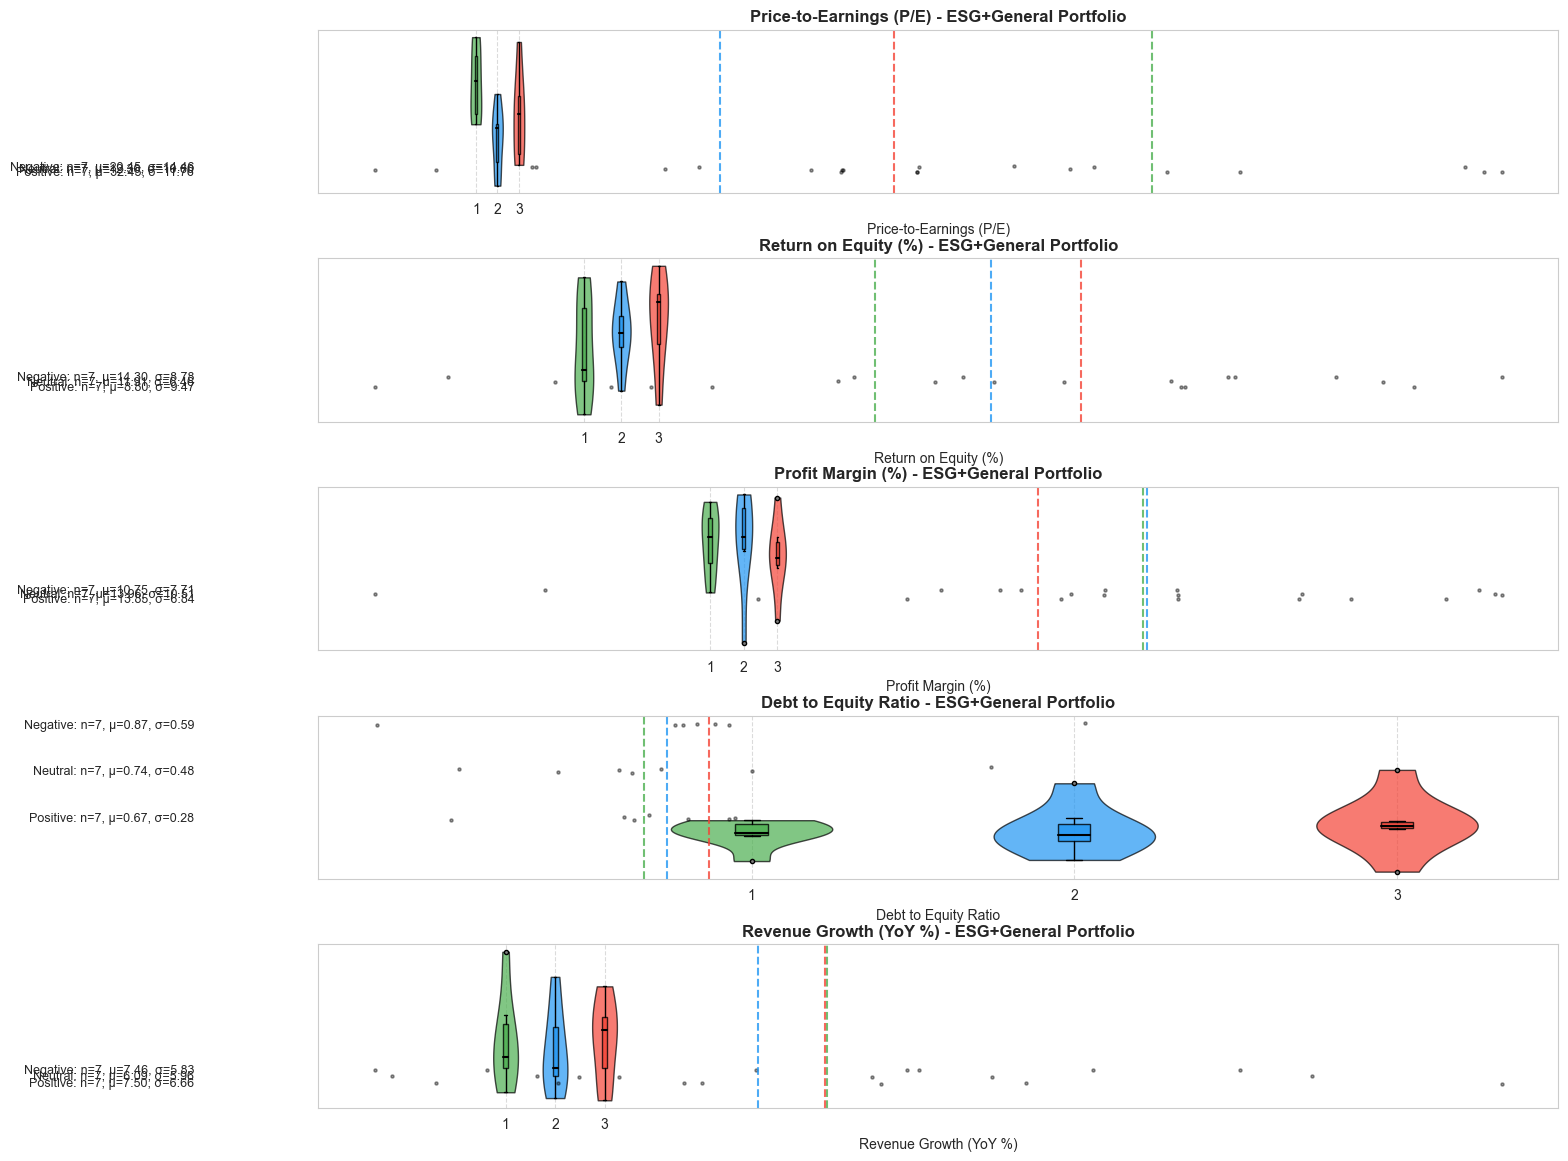

/var/folders/h7/29kfhqj1241f_d1md9w647nw0000gn/T/ipykernel_23277/413365729.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



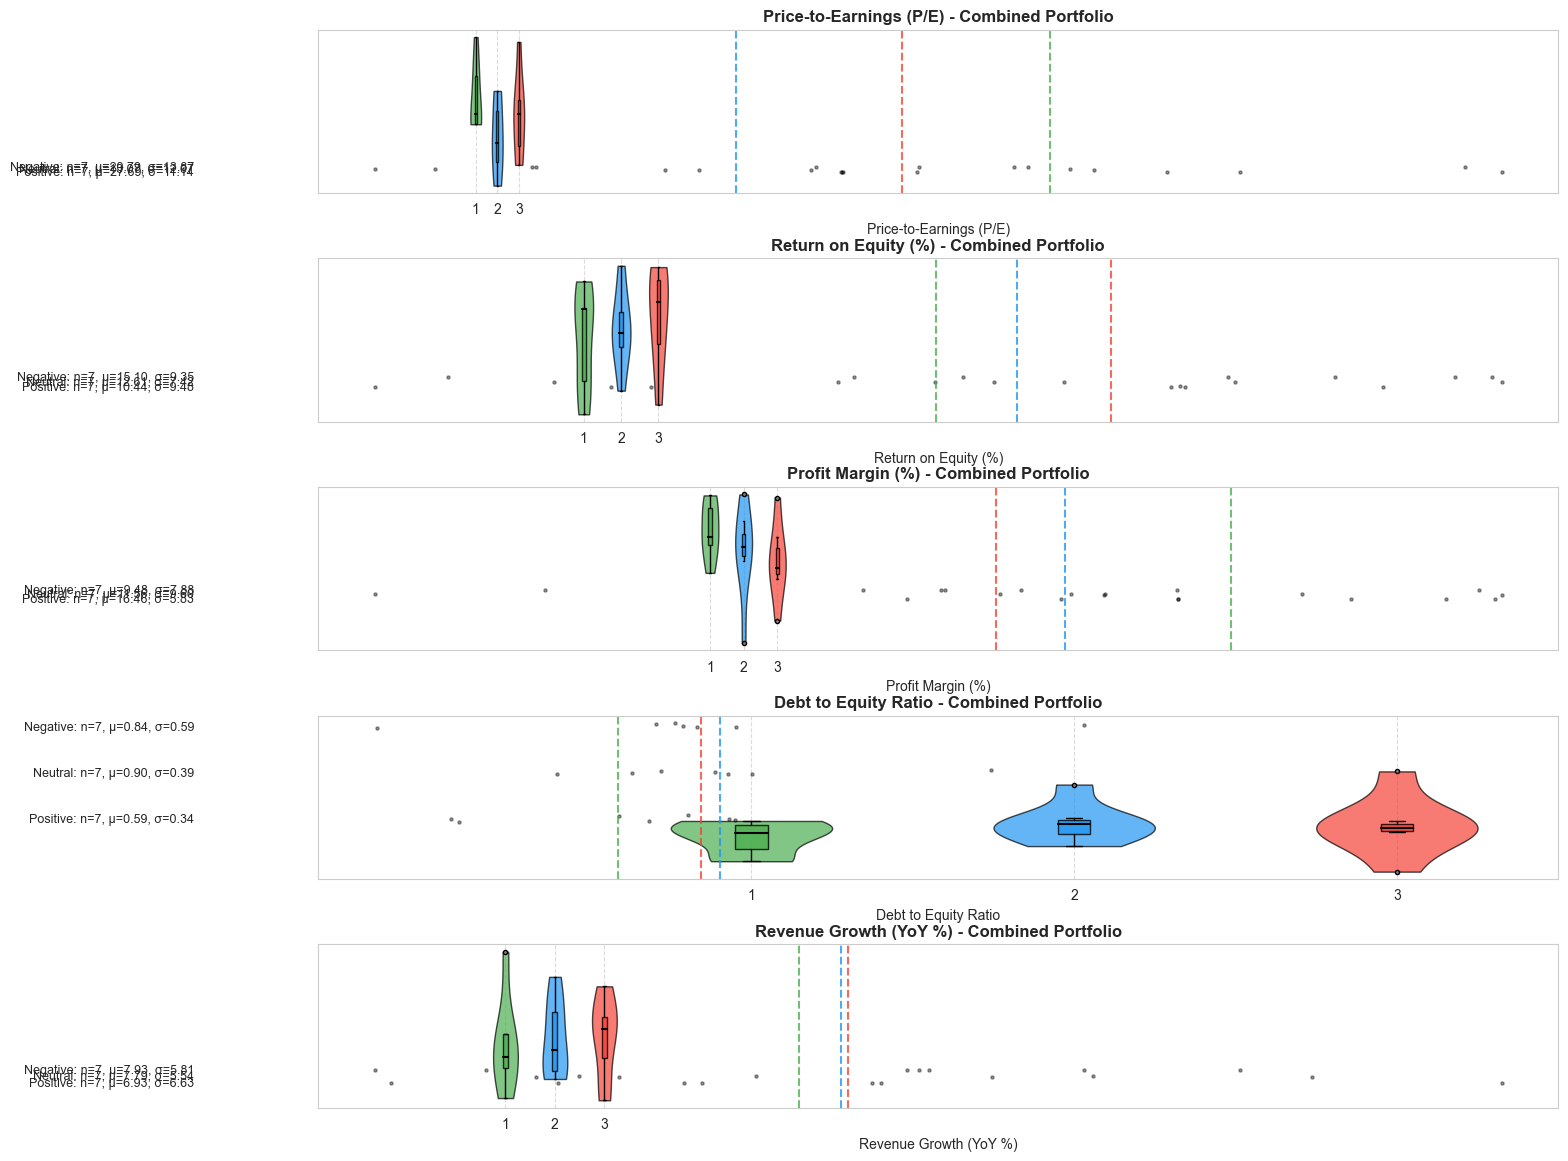

In [34]:
# Function to create better boxplots with labels and statistics on the left with fixed spacing
def create_improved_boxplots(portfolio_name):
    """Create improved boxplots with labels and statistics on the left with fixed spacing."""
    
    # Define key ratios with proper display names
    key_ratios = {
        'P/E': {'title': 'Price-to-Earnings (P/E)', 'format': lambda x: x},
        'ROE (%)': {'title': 'Return on Equity (%)', 'format': lambda x: x},
        'Profit Margin (%)': {'title': 'Profit Margin (%)', 'format': lambda x: x},
        'Debt to Equity': {'title': 'Debt to Equity Ratio', 'format': lambda x: x},
        'Revenue Growth (YoY %)': {'title': 'Revenue Growth (YoY %)', 'format': lambda x: x}
    }
    
    # Create figure with adjusted spacing
    fig = plt.figure(figsize=(16, 14))
    gs = GridSpec(len(key_ratios), 1, figure=fig, hspace=0.4)
    
    # Process each ratio
    for i, (ratio_key, ratio_info) in enumerate(key_ratios.items()):
        ax = fig.add_subplot(gs[i])
        
        # Data for box plots
        data_to_plot = []
        labels = []
        stats_info = []
        
        # Add data for each category
        for category in ['Positive', 'Neutral', 'Negative']:
            if category in portfolios[portfolio_name]:
                category_tickers = portfolios[portfolio_name][category]
                category_df = fund_df[fund_df['Ticker'].isin(category_tickers)]
                
                if not category_df.empty and ratio_key in category_df.columns:
                    ratio_data = category_df[ratio_key].dropna()
                    if len(ratio_data) > 0:
                        formatted_data = ratio_info['format'](ratio_data)
                        data_to_plot.append(formatted_data)
                        mean_val = np.mean(formatted_data)
                        std_val = np.std(formatted_data)
                        count = len(formatted_data)
                        stats_info.append(f"{category}: n={count}, μ={mean_val:.2f}, σ={std_val:.2f}")
                        labels.append(category)
        
        # Create box plot if we have data
        if data_to_plot:
            parts = ax.violinplot(data_to_plot, showmeans=False, showmedians=False, showextrema=False)
            for j, pc in enumerate(parts['bodies']):
                pc.set_facecolor(colors[labels[j]])
                pc.set_edgecolor('black')
                pc.set_alpha(0.7)
            
            box_parts = ax.boxplot(data_to_plot, patch_artist=True, widths=0.1, 
                                   medianprops={'color': 'black', 'linewidth': 1.5},
                                   flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markersize': 3})
            for j, box in enumerate(box_parts['boxes']):
                box.set(facecolor=colors[labels[j]], alpha=0.8)
            
            for j, data in enumerate(data_to_plot):
                y = np.random.normal(j + 1, 0.04, size=len(data))
                ax.scatter(data, y, alpha=0.4, s=5, color='black')
                ax.axvline(np.mean(data), color=colors[labels[j]], linestyle='--', alpha=0.8, linewidth=1.5)
            
            # Remove y-axis labels and ticks, add custom labels and stats on the left
            ax.set_yticks([])
            ax.set_ylabel('')
            
            # Add category labels and statistics on the left with fixed spacing
            fixed_spacing = 1.0  # Fixed spacing between categories
            y_positions = [fixed_spacing * (idx + 1) for idx in range(len(labels))]
            for idx, stat in enumerate(stats_info):
                ax.text(-0.1, y_positions[idx], stat, ha='right', va='center', 
                        transform=ax.get_yaxis_transform(), fontsize=9)
            
            # Keep x-axis ticks at the bottom
            ax.set_xticks(range(1, 4))
            ax.set_xticklabels(range(1, 4))
            ax.set_xlabel(ratio_info['title'])
            ax.grid(True, linestyle='--', alpha=0.7)
            
            # Set title
            ax.set_title(f"{ratio_info['title']} - {portfolio_name} Portfolio", fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    return fig

# Create and save violin plots for each portfolio
for portfolio in portfolios:
    fig = create_improved_boxplots(portfolio)
    # Convert portfolio name to match LaTeX figure names
    portfolio_filename = portfolio.replace('+', '_') + '_Violin_Plots.png'
    fig.savefig(f"./results/funda_plot/{portfolio_filename}", format='png', dpi=100, bbox_inches='tight')
    display(HTML(f'<h2>{portfolio} Portfolio Analysis</h2>'))
    display(HTML(fig_to_html(fig)))
    plt.close(fig)


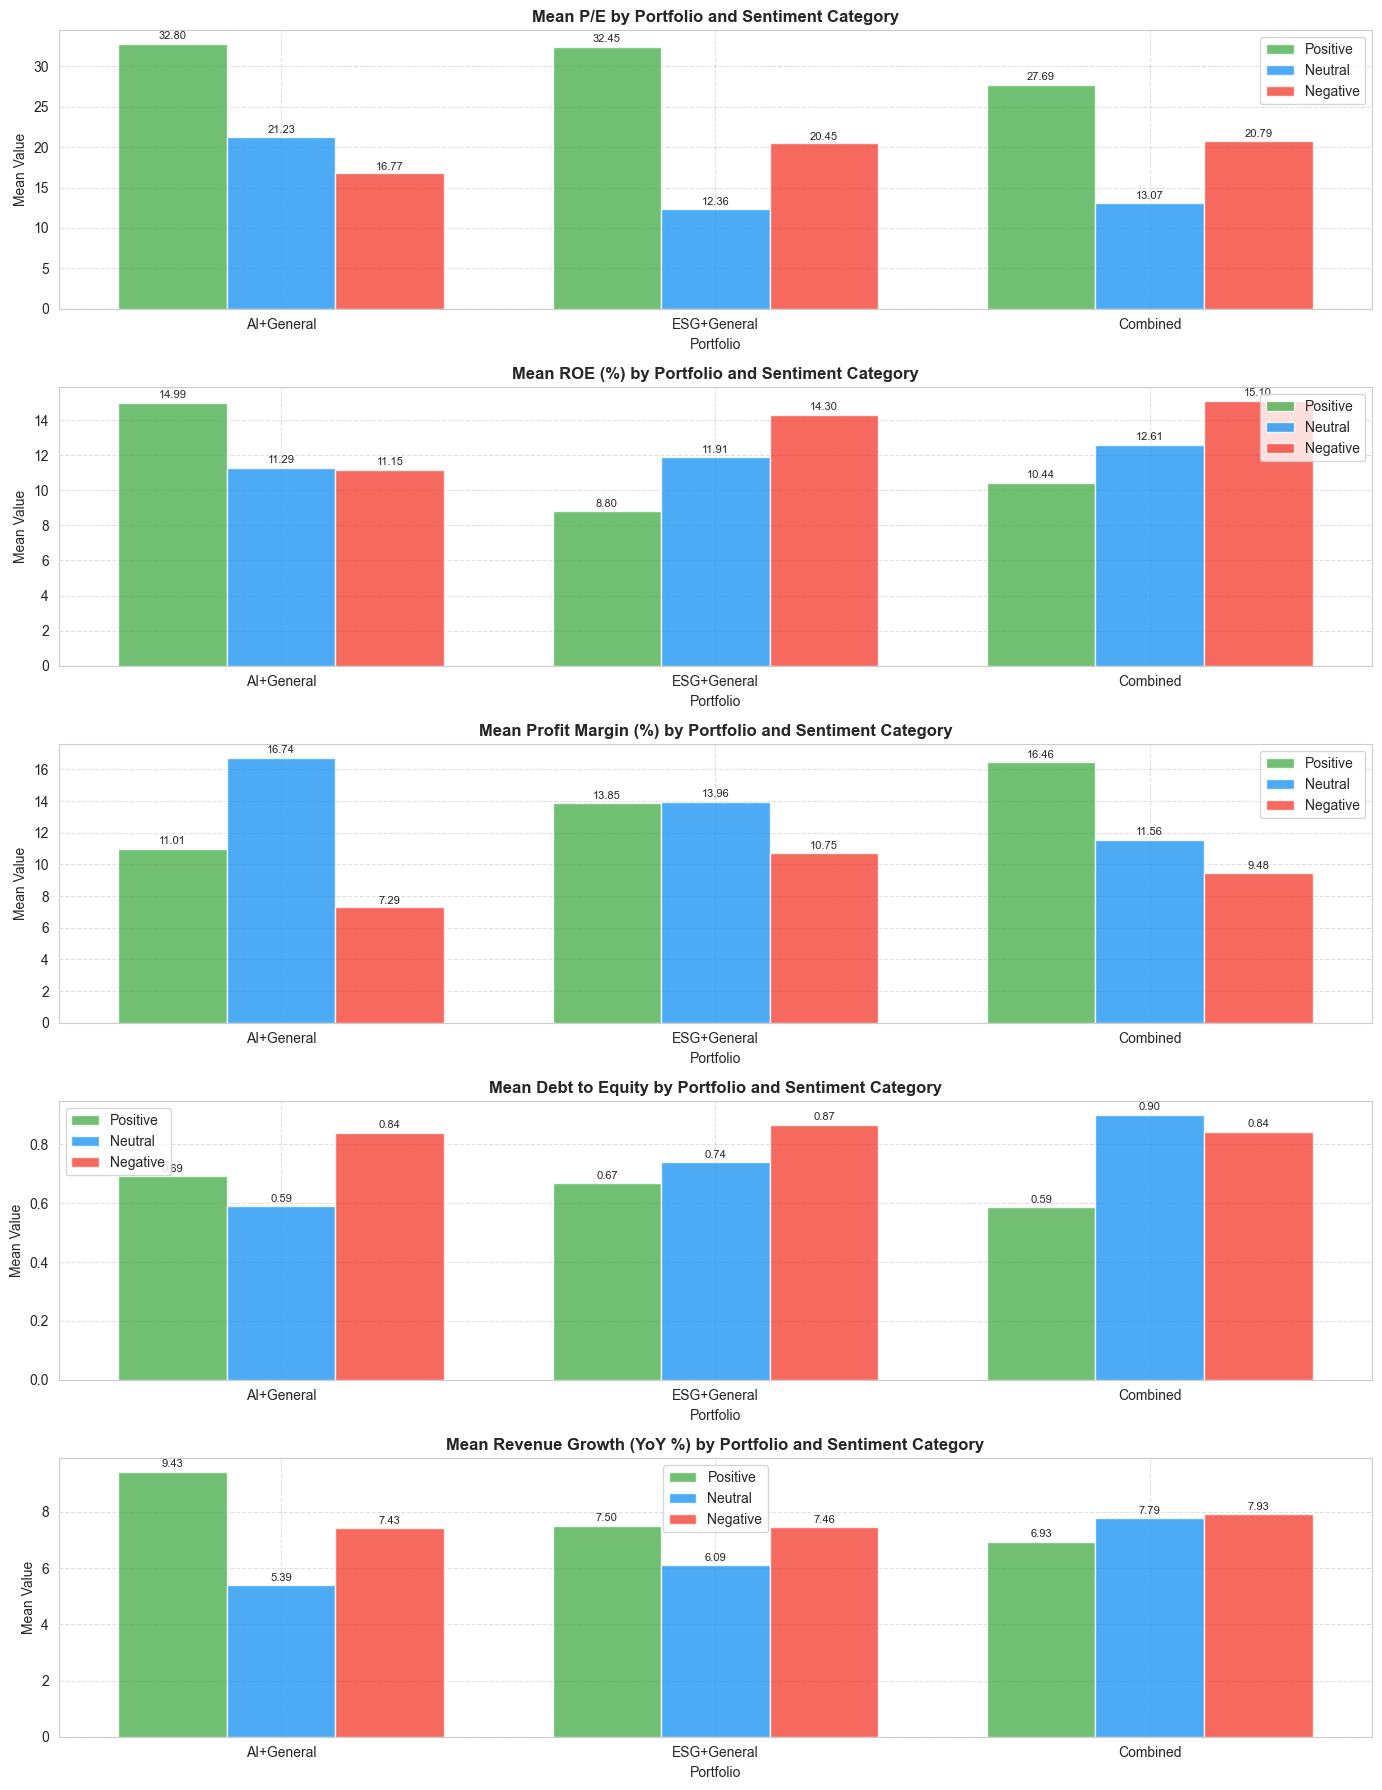

In [35]:
# Create a consolidated financial metrics comparison across all portfolios
def create_comparative_metrics_plot():
    """Create a consolidated comparative view of key metrics across portfolios."""
    
    metrics = ['P/E', 'ROE (%)', 'Profit Margin (%)', 'Debt to Equity', 'Revenue Growth (YoY %)']
    portfolio_names = list(portfolios.keys())
    categories = ['Positive', 'Neutral', 'Negative']
    
    comparison_data = {
        metric: {portfolio: {category: 0 for category in categories} 
                for portfolio in portfolio_names} 
        for metric in metrics
    }
    
    for portfolio in portfolio_names:
        for category in categories:
            if category in portfolios[portfolio]:
                category_tickers = portfolios[portfolio][category]
                category_df = fund_df[fund_df['Ticker'].isin(category_tickers)]
                for metric in metrics:
                    if metric in category_df.columns:
                        metric_data = category_df[metric].dropna()
                        if len(metric_data) > 0:
                            comparison_data[metric][portfolio][category] = np.mean(metric_data)
    
    fig, axes = plt.subplots(len(metrics), 1, figsize=(14, 18))
    bar_width = 0.25
    index = np.arange(len(portfolio_names))
    category_colors = [colors[cat] for cat in categories]
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        for j, category in enumerate(categories):
            values = [comparison_data[metric][portfolio][category] for portfolio in portfolio_names]
            position = index + (j - 1) * bar_width
            bars = ax.bar(position, values, bar_width, label=category, color=category_colors[j], alpha=0.8)
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01 * max(values),
                       f'{height:.2f}', ha='center', va='bottom', fontsize=8)
        
        ax.set_xlabel('Portfolio')
        ax.set_ylabel('Mean Value')
        ax.set_title(f'Mean {metric} by Portfolio and Sentiment Category', fontweight='bold')
        ax.set_xticks(index)
        ax.set_xticklabels(portfolio_names)
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    return fig

# Create, save, and display the comparative metrics visualization
display(HTML('<h2>Comparative Metrics Analysis Across Portfolios</h2>'))
comparative_fig = create_comparative_metrics_plot()
comparative_fig.savefig("./results/funda_plot/Comparative_Metrics_Bar_Plots.png", format='png', dpi=100, bbox_inches='tight')
display(HTML(fig_to_html(comparative_fig)))
plt.close(comparative_fig)



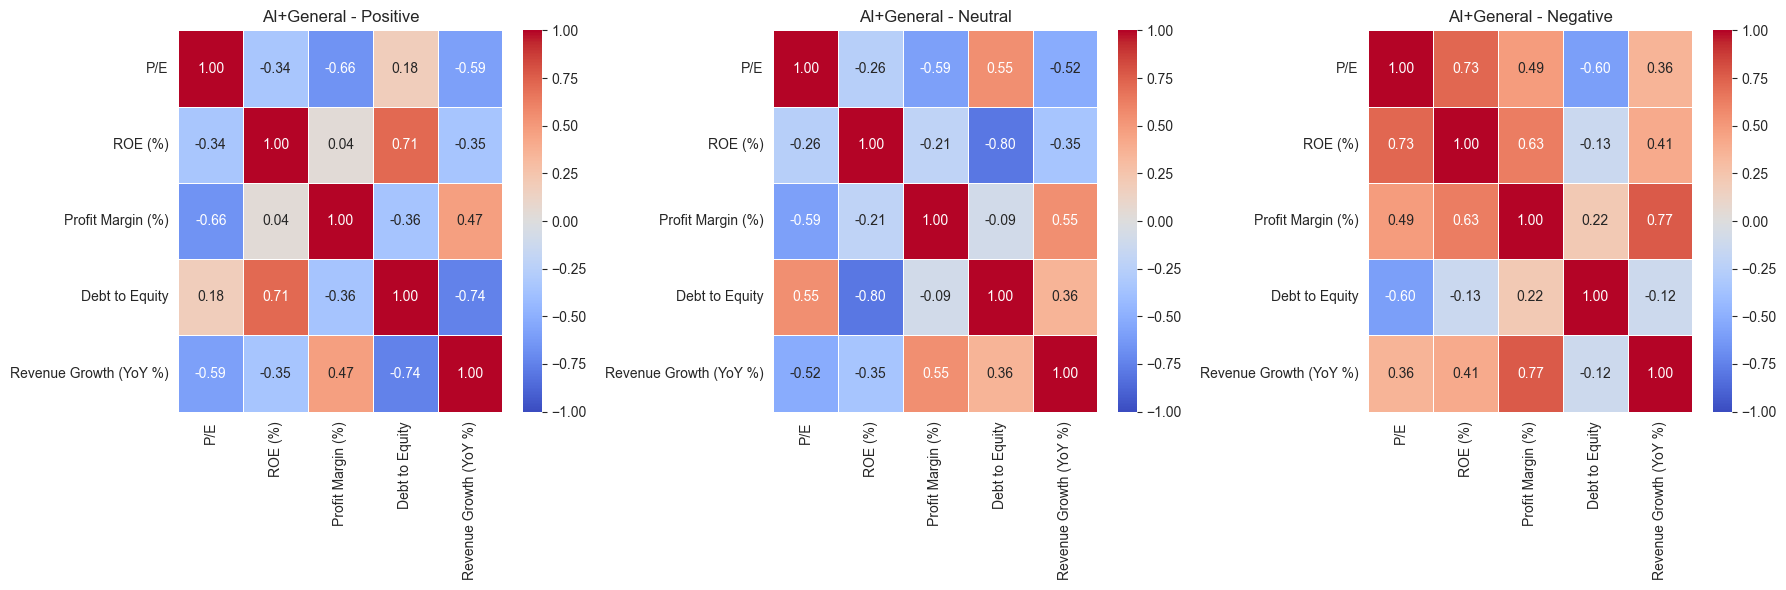


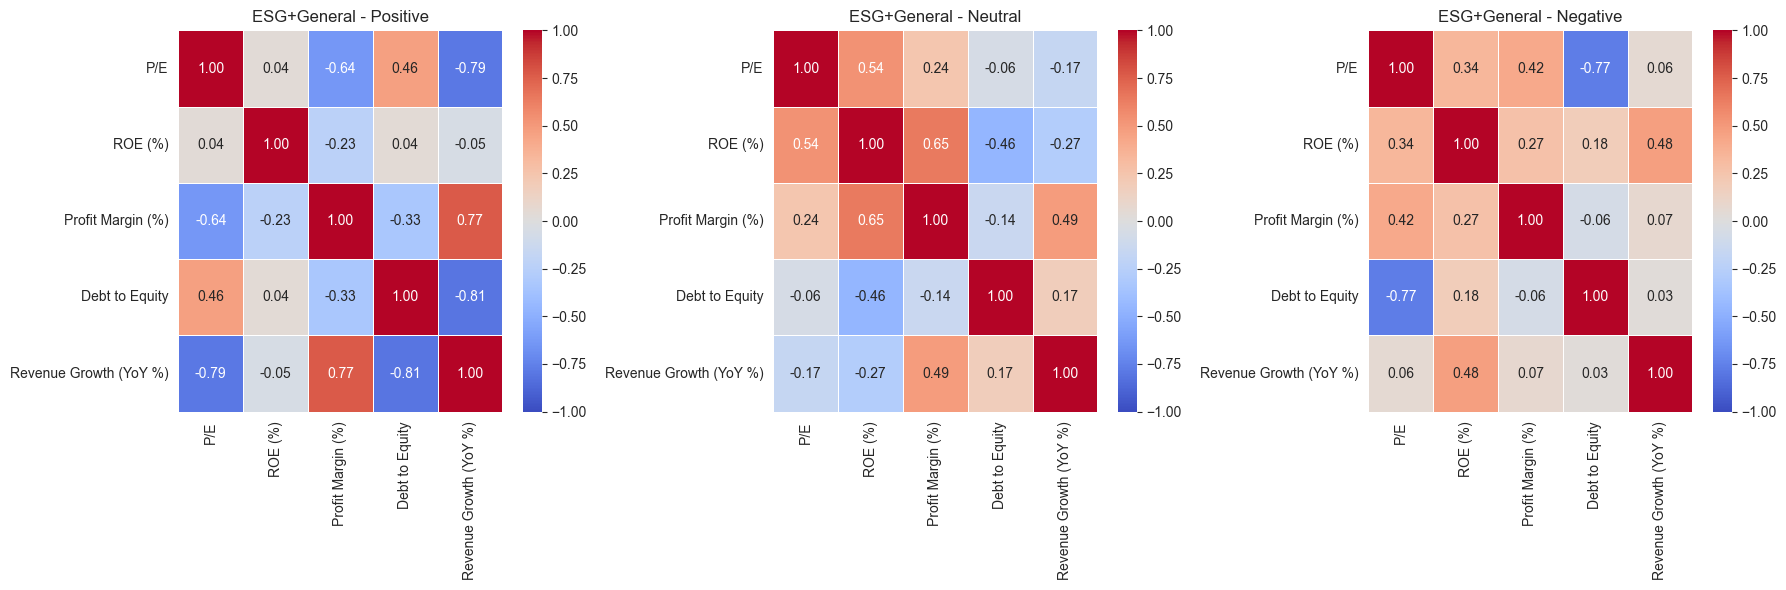


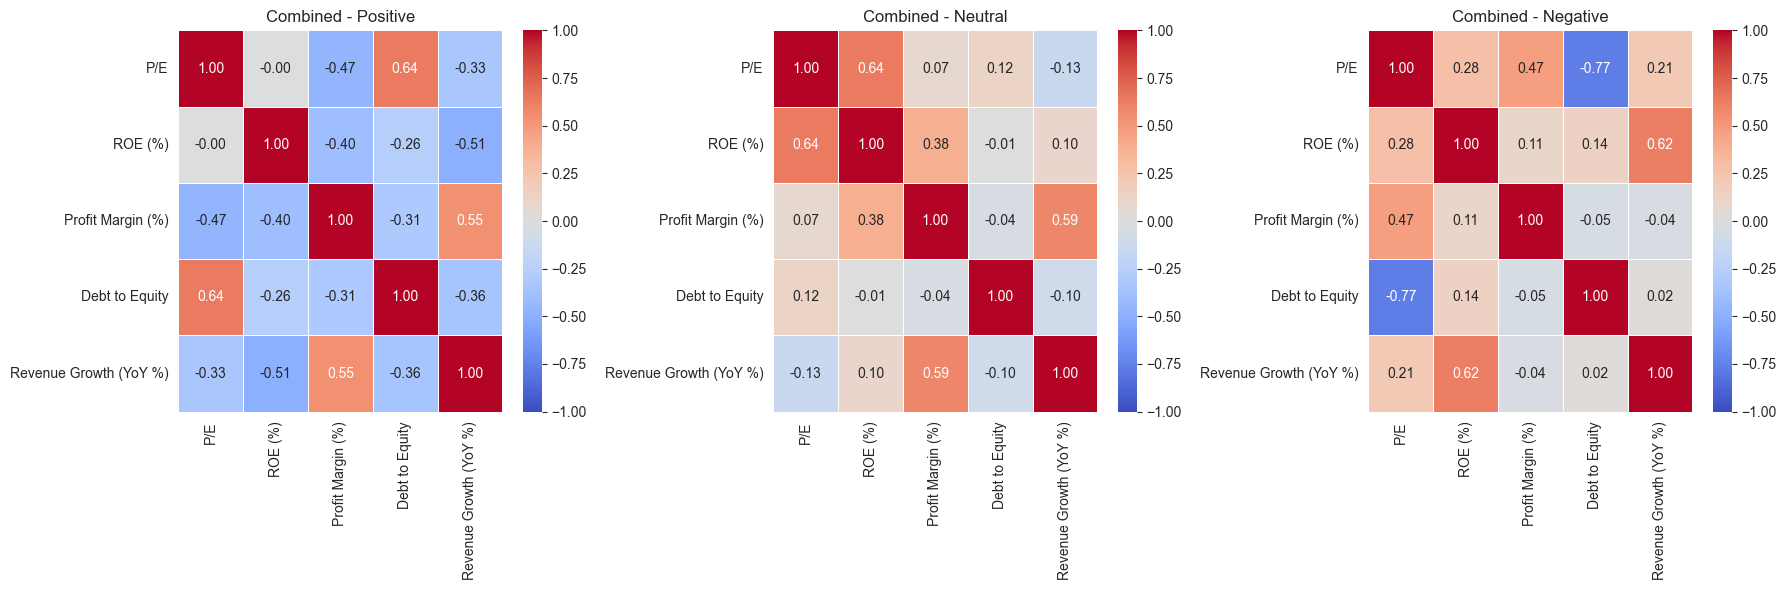

In [36]:
# Create a correlation heatmap to show relationships between key metrics
def create_correlation_heatmap(portfolio_name):
    """Create a correlation heatmap between financial metrics for each sentiment category."""
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    categories = ['Positive', 'Neutral', 'Negative']
    
    for i, category in enumerate(categories):
        if category in portfolios[portfolio_name]:
            ax = axes[i]
            category_tickers = portfolios[portfolio_name][category]
            category_df = fund_df[fund_df['Ticker'].isin(category_tickers)]
            
            financial_metrics = ['P/E', 'ROE (%)', 'Profit Margin (%)', 'Debt to Equity', 'Revenue Growth (YoY %)']
            metrics_df = category_df[financial_metrics].dropna()
            
            if not metrics_df.empty:
                corr_matrix = metrics_df.corr()
                sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
                           linewidths=0.5, ax=ax, vmin=-1, vmax=1)
                ax.set_title(f'{portfolio_name} - {category}')
            else:
                ax.text(0.5, 0.5, "Insufficient data", ha='center', va='center')
                ax.axis('off')
    
    plt.tight_layout()
    return fig

# Create, save, and display correlation heatmaps for each portfolio
for portfolio in portfolios:
    display(HTML(f'<h2>{portfolio} Correlation Analysis</h2>'))
    corr_fig = create_correlation_heatmap(portfolio)
    portfolio_filename = portfolio.replace('+', '_') + '_Correlation_Heatmap.png'
    corr_fig.savefig(f"./results/funda_plot/{portfolio_filename}", format='png', dpi=100, bbox_inches='tight')
    display(HTML(fig_to_html(corr_fig)))
    plt.close(corr_fig)


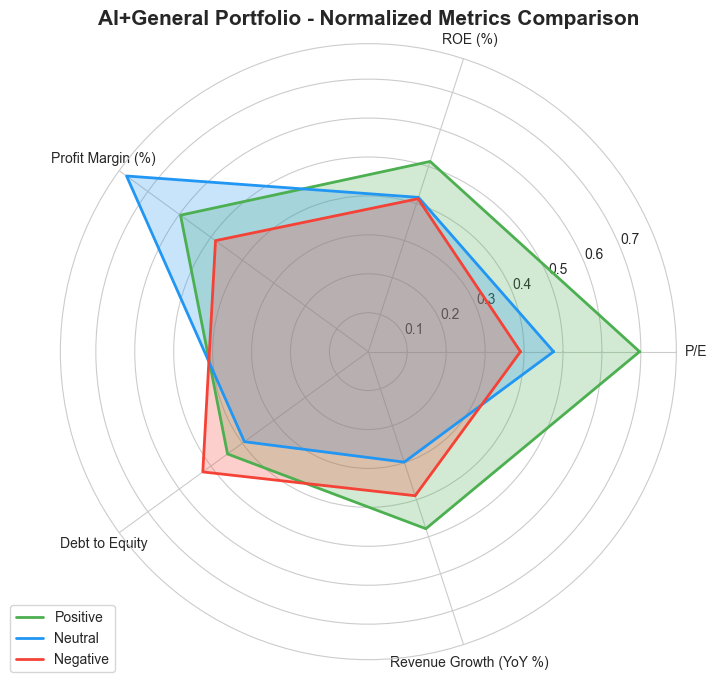


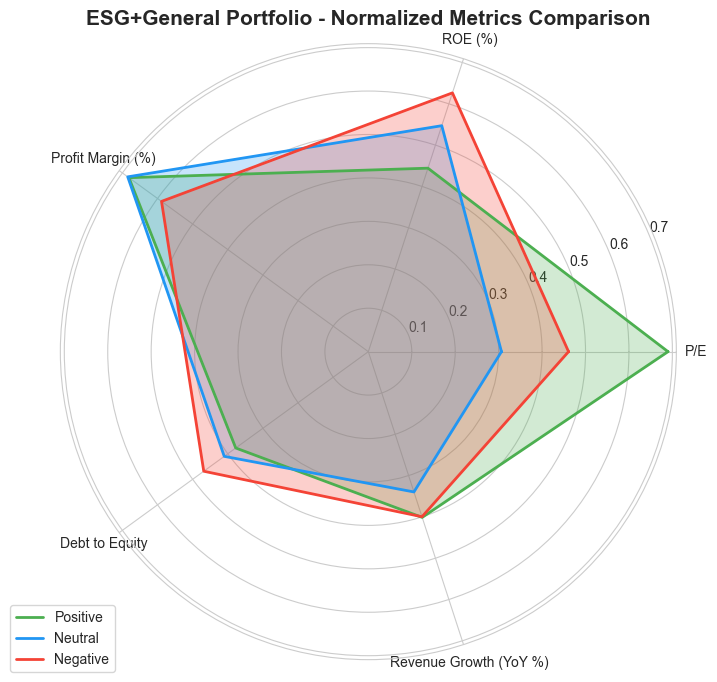


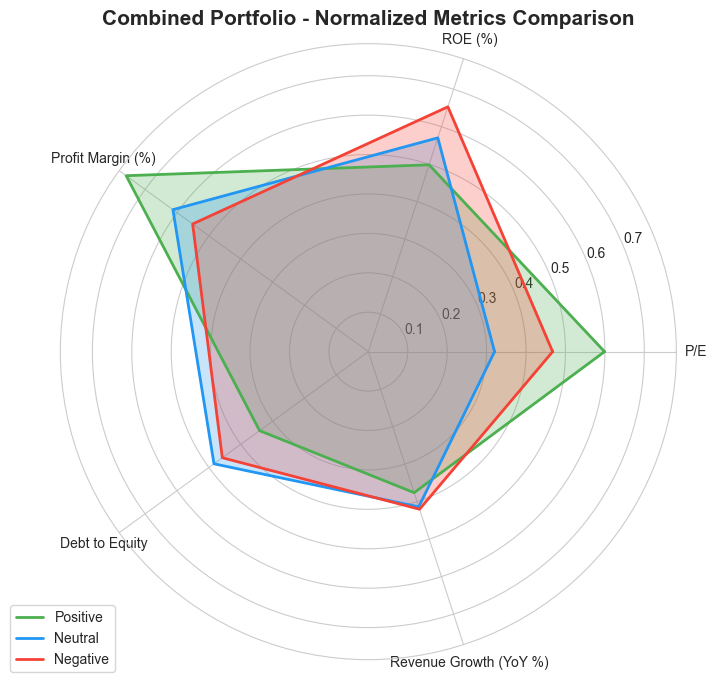

In [37]:
# Create a radar chart to compare key metrics across sentiment categories
def create_radar_charts():
    """Create radar charts to compare financial metrics across sentiment categories."""
    
    metrics = ['P/E', 'ROE (%)', 'Profit Margin (%)', 'Debt to Equity', 'Revenue Growth (YoY %)']
    categories = ['Positive', 'Neutral', 'Negative']
    
    for portfolio in portfolios:
        fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
        category_means = {}
        for category in categories:
            if category in portfolios[portfolio]:
                category_tickers = portfolios[portfolio][category]
                category_df = fund_df[fund_df['Ticker'].isin(category_tickers)]
                
                means = []
                for metric in metrics:
                    if metric in category_df.columns:
                        metric_data = category_df[metric].dropna()
                        if len(metric_data) > 0:
                            all_data = []
                            for cat in categories:
                                if cat in portfolios[portfolio]:
                                    cat_tickers = portfolios[portfolio][cat]
                                    cat_df = fund_df[fund_df['Ticker'].isin(cat_tickers)]
                                    if metric in cat_df.columns:
                                        cat_data = cat_df[metric].dropna()
                                        if len(cat_data) > 0:
                                            all_data.extend(cat_data)
                            
                            min_val = min(all_data) if all_data else 0
                            max_val = max(all_data) if all_data else 1
                            if max_val > min_val:
                                mean_val = np.mean(metric_data)
                                normalized = (mean_val - min_val) / (max_val - min_val)
                            else:
                                normalized = 0.5
                            means.append(normalized)
                        else:
                            means.append(0)
                    else:
                        means.append(0)
                category_means[category] = means
        
        angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
        angles += angles[:1]
        
        for category in categories:
            if category in category_means:
                values = category_means[category]
                values += values[:1]
                ax.plot(angles, values, linewidth=2, linestyle='solid', label=category, color=colors[category])
                ax.fill(angles, values, color=colors[category], alpha=0.25)
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics)
        ax.set_title(f'{portfolio} Portfolio - Normalized Metrics Comparison', size=15, fontweight='bold')
        ax.grid(True)
        ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        
        portfolio_filename = portfolio.replace('+', '_') + '_Radar_Chart.png'
        fig.savefig(f"./results/funda_plot/{portfolio_filename}", format='png', dpi=100, bbox_inches='tight')
        display(HTML(f'<h2>{portfolio} Radar Chart Analysis</h2>'))
        display(HTML(fig_to_html(fig)))
        plt.close(fig)

# Create, save, and display radar charts
create_radar_charts()

## Step 6: Investment Strategy

Based on the fundamental analysis, we propose the following investment strategy:

- **Aggressive Growth (50%)**:
  - Focus on the **Positive** categories across all portfolios (AI+General, ESG+General, Combined).
  - Target companies like AMAT, TSM, and NVDA, which exhibit high ROE (26–27%) and profit margins (18–20%).
  - These portfolios show strong growth potential despite higher P/E ratios, indicating market optimism.
  - Rebalance quarterly to mitigate volatility risks due to high P/E variability (e.g., Std Dev of 28–29).

- **Balanced Growth (30%)**:
  - Invest in **Neutral** categories (e.g., MU, ADBE, SHOP).
  - These offer stability with moderate returns (ROE 8–10%, Profit Margin 12–14%) and lower debt (Debt to Equity ~1.0).
  - Suitable for long-term holding, focusing on companies with consistent revenue growth (5–6%).

- **Value Investing (20%)**:
  - Target **Negative** categories (e.g., NIO, TSLA, JPM) for undervalued stocks with potential turnaround.
  - These have lower P/E ratios (11–14) but higher debt (Debt to Equity 1.3–1.5), indicating higher risk.
  - Use a contrarian approach with strict stop-losses to manage debt-related risks.

- **Diversification**:
  - Spread investments across sectors (Technology, Financials, EVs) to reduce sector-specific risks.
  - Use sentiment-driven terciles to adjust allocations based on market sentiment shifts, ensuring adaptability to changing investor perceptions.

Benefits of Sentiment-Based Portfolio Division

Using sentiment to divide portfolios into terciles offers several advantages:

- **Enhanced Decision-Making**:
  - Sentiment analysis (AI+General, ESG+General, Combined) provides behavioral insights from news-driven investor perceptions.
  - Complements traditional metrics like P/E and ROE, helping identify undervalued (Negative) or overvalued (Positive) stocks early.

- **Risk Management**:
  - Negative categories highlight high-debt or low-margin companies (e.g., NIO, JPM), allowing risk-averse investors to avoid or hedge these positions.
  - Positive categories signal growth opportunities (e.g., TSM, NVDA) with strong fundamentals, reducing exposure to underperforming stocks.

- **Market Adaptation**:
  - Sentiment reflects real-time market trends, such as the ESG focus in Positive ESG+General portfolios.
  - Enables dynamic reallocation to capitalize on emerging narratives like sustainability or AI innovation, aligning with investor priorities.

- **Profit Potential**:
  - Positive terciles consistently show higher ROE (25–27%) and profit margins (18–20%), suggesting that sentiment-driven selection can outperform market averages.
  - As sentiment data coverage grows, the predictive power of these terciles is expected to increase, enhancing returns for investors.

## Conclusion

This analysis demonstrates that sentiment-based portfolio division provides a valuable framework for fundamental analysis. The Positive categories across all portfolios exhibit superior fundamentals, making them suitable for growth-oriented strategies, while Neutral categories offer stability, and Negative categories present value opportunities with higher risk. The use of sentiment enhances decision-making, risk management, and market adaptability, offering a robust approach to portfolio construction. Future work could incorporate more sentiment data sources (e.g., social media) and advanced NLP models to further refine these divisions.